# Step1: Importing Libraries

In [72]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

Machine Learning:
-
- TensorFlow (deep learning with neural networks)*
- scikit-learn (machine learning algorithms)
- keras (high-level neural networks API)

Data Science:
-
- pandas (data analysis)
- NumPy (multidimensional arrays)
- SciPy (algorithms to use with numpy)
- HDF5 (store & manipulate data)
- matplotlib (data visualization)

# Step2: Loading Data

In [73]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


# Step3: Preprocessing Data

In [74]:
train_images.shape

(60000, 28, 28)

In [75]:
train_labels.shape

(60000,)

In [76]:
test_images.shape

(10000, 28, 28)

In [81]:
test_labels.shape

(10000,)

In [82]:
test_labels[100]

6

In [83]:
train_images.ndim

3

In [84]:
train_images[0].shape

(28, 28)

In [85]:
img = train_images[10]
type(img)

numpy.ndarray

In [86]:
img.ndim

2

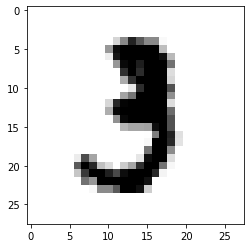

In [87]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [88]:
#img

Before training, we’ll preprocess the data by reshaping it into the shape the network
expects and scaling it so that all values are in the [0, 1] interval. Previously, our training images, for instance, were stored in an array of shape (60000, 28, 28) of type
uint8 with values in the [0, 255] interval. We transform it into a float32 array of
shape (60000, 28 * 28) with values between 0 and 1.

In [89]:
#Training Images

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

#Testing Images

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [90]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [91]:
test_images.dtype

dtype('float32')

# Preparing the labels

In [92]:
print(train_labels.shape)
print(test_labels.shape)

(60000,)
(10000,)


In [93]:
print(train_labels[100])
print(test_labels[100])


5
6


In [94]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [95]:
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [96]:
print(train_labels[100])
print(test_labels[100])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Note In machine learning:
-
- a category in a classification problem is called aclass.
- Data points are called samples. 
- The class associated with a specific sample is called a label.

# Building Network Architecture

In [97]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [98]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


- The core building block of neural networks is the layer
- our model consists of a sequence of two Dense layers, which are densely connected (also called fully connected) neural layers.
  The second (and last) layer is a 10-waysoftmax classification layer, which means it will return an array of 10 probability 
  scores (summing to 1). Each score will be the probability that the current digit imagebelongs to one of our 10 digit classes.

1.RELU Activation Function:
-
- linear function that will output the input directly if it is positive, otherwise, it will output zero.

Optimizer
-
- An optimizer is a function or an algorithm that modifies the attributes of the neural network, 
  such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.

categorical_crossentropy: 
-
-   Used as a loss function for multi-class classification model where there are two or more output labels.
    The output label is assigned one-hot category encoding value in form of 0s and 1

The compilation step
-   

In [103]:
network.compile(optimizer="rmsprop",
                     loss="categorical_crossentropy",
                     metrics=["accuracy"])

Three more things as part of the compilation step:
-
-  An optimizer—The mechanism through which the model will update itself based on the training data it sees, so as to improve     its performance.
-  A loss function—How the model will be able to measure its performance on the training data, and thus how it will be able to     steer itself in the right direction.
-  Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were       correctly classified).

# “Fitting” the model

In [104]:
60000/128  #     step per epoches

468.75

In [105]:
batch = train_images[:128]

# Next batch

batch = train_images[128:256]

In [106]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 10s 19ms/step - loss: 0.2273 - accuracy: 0.9307
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0831 - accuracy: 0.9738
Epoch 3/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0547 - accuracy: 0.9833
Epoch 4/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0395 - accuracy: 0.9876
Epoch 5/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0291 - accuracy: 0.9911


# Test the Model

In [107]:
network.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.0718 - accuracy: 0.9807


[0.07178343832492828, 0.9807000160217285]

Using the model to make predictions
-  

In [109]:
test_digits = test_images[0:10]
predictions = network.predict(test_digits)
predictions[0]

array([1.4392144e-11, 5.8488731e-10, 7.1459681e-08, 1.0468821e-07,
       5.1583004e-12, 2.5102009e-10, 3.1449359e-15, 9.9999964e-01,
       2.2715969e-09, 7.9888757e-08], dtype=float32)

- This first test digit has the highest probability score (0.99999106, almost 1) at
  index 7, so according to our model, it must be a 7:

In [136]:
 predictions[0].argmax()

7

In [137]:
predictions[0][7]

0.99999964

We can check that the test label agrees:
- 

In [141]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Displaying the fourth digit
-

In [142]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [143]:
train_images.dtype

dtype('uint8')

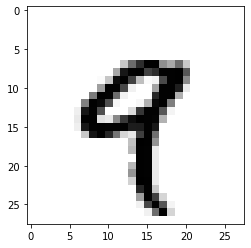

In [144]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [145]:
train_labels[4]

9

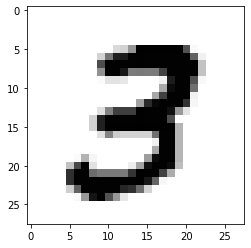

In [146]:
import matplotlib.pyplot as plt
digit = train_images[7]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [147]:
train_labels[7]

3